In [ ]:
import pandas as pd

# New Section

In [ ]:
url = 'https://github.com/Prateek190/data/raw/master/data.csv'
df = pd.read_csv(url)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import math as m
import os
from scipy import stats

np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import Lars
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import torch
import torch.nn as nn
torch.set_default_tensor_type(torch.DoubleTensor)
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [ ]:

print(df.shape)
df=df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1)
if True in df.isnull().sum()!=0:
    print(df.isnull().sum())

(1470, 35)


In [ ]:
category_list=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
data=df
for s in category_list:
    label=LabelEncoder()
    data[s]=label.fit_transform(data[s])
    print(label.classes_)
    print(label.transform(label.classes_))
    data=pd.get_dummies(data,columns=[s],prefix=[s])
df=data
print(df.columns)
df.head()

['No' 'Yes']
[0 1]
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
[0 1 2]
['Human Resources' 'Research & Development' 'Sales']
[0 1 2]
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
[0 1 2 3 4 5]
['Female' 'Male']
[0 1]
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
[0 1 2 3 4 5 6 7 8]
['Divorced' 'Married' 'Single']
[0 1 2]
['No' 'Yes']
[0 1]
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion',

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_0,Attrition_1,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2,Department_0,Department_1,Department_2,EducationField_0,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,Gender_0,Gender_1,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,OverTime_0,OverTime_1
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
train=df[df['Attrition_1']==1]
test=df[df['Attrition_1']==0]

y_train=train['YearsInCurrentRole']
x_train=train.drop(['YearsInCurrentRole','Attrition_1','Attrition_0'],axis=1)
y_test=test['YearsInCurrentRole']
x_test=test.drop(['YearsInCurrentRole','Attrition_1','Attrition_0'],axis=1)

scaler=StandardScaler()
scaler.fit(x_train)
x1=scaler.transform(x_train)
x2=scaler.transform(x_test)
pca=PCA(0.95)
pca.fit(x1)
x1=pca.transform(x1)
x2=pca.transform(x2)

In [ ]:
y_all=[[]]
def my_custom_loss_func(y_true, y_pred):
    a=0
    for i,j in zip(y_true,y_pred):
        if i<=j and j<=2*i:
            a=a+1
    return a
scorer = make_scorer(my_custom_loss_func, greater_is_better=True)

575
[5.240e+00 5.030e+00 2.080e+00 6.260e+00 4.400e-01 1.600e-01 5.840e+00
 5.640e+00 2.750e+00 5.310e+00 3.060e+00 1.990e+00 7.170e+00 2.910e+00
 5.000e-02 7.210e+00 1.920e+00 2.210e+00 8.450e+00 0.000e+00 1.095e+01
 6.730e+00 8.980e+00 2.150e+00 0.000e+00 2.390e+00 4.620e+00 2.850e+00
 1.980e+00 0.000e+00 2.890e+00 1.000e-02 3.000e-02 7.190e+00 7.300e+00
 6.890e+00 1.000e-02 6.150e+00 1.000e-02 2.270e+00 2.150e+00 1.790e+00
 8.040e+00 6.920e+00 1.720e+00 6.310e+00 6.630e+00 6.350e+00 7.110e+00
 1.084e+01 7.180e+00 7.650e+00 3.040e+00 3.060e+00 1.500e-01 1.970e+00
 2.440e+00 2.590e+00 0.000e+00 6.210e+00 0.000e+00 6.590e+00 6.310e+00
 0.000e+00 2.890e+00 2.370e+00 6.730e+00 3.050e+00 1.000e-02 5.620e+00
 2.760e+00 3.380e+00 0.000e+00 2.340e+00 5.550e+00 7.700e+00 6.080e+00
 6.220e+00 7.470e+00 6.020e+00 2.300e+00 1.850e+00 2.950e+00 8.010e+00
 2.090e+00 0.000e+00 6.720e+00 1.000e-01 1.910e+00 9.330e+00 2.180e+00
 0.000e+00 6.620e+00 3.210e+00 3.310e+00 0.000e+00 3.020e+00 7.380e+00
 5

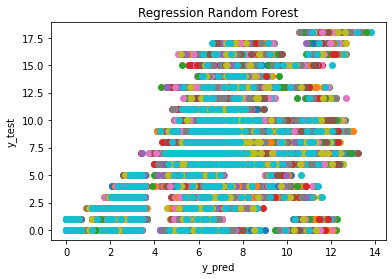

In [ ]:
#A1. Model start 
#Regression Random Forest 
y_pred=[]
y_reg=[]
a=0
b=0
for i in range(1,51):
    reg1=RandomForestRegressor()
    reg1.fit(x_train,y_train)
    y_pred=reg1.predict(x_test)
    plt.scatter(y_pred,y_test)
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Regression Random Forest')
    a=np.sum(y_pred>=y_test)
    if (a>b):
        y_reg=y_pred
        b=a
    a=0
print(b)
print(y_reg)
y_all.append(y_reg)
#plt.savefig("Regression Random Forest ")


584
[ 3.98  3.05  3.33  3.29  2.87  0.45  2.88  6.34  2.11  3.81  2.95  1.67
  6.77  2.66  1.15  8.66  3.72  2.67  8.9   0.35  6.15  5.31  8.2   5.24
  0.75  2.53  3.85  2.64  2.85  2.14  3.12  0.46  0.63  5.74  3.56  5.07
  0.76  4.12  0.56  2.91  3.63  1.9  10.03  6.28  2.55  3.25  2.33  4.77
  3.69 12.05  6.7   7.69  5.79  1.62  2.18  2.43  5.63  2.37  0.23  3.62
  2.63  3.95  6.8   5.88  8.55  1.69  4.    2.65  5.7   4.91  1.38  5.91
  0.89  2.59  6.6   7.88  4.19  5.11  6.71  6.06  5.43  2.49  3.2   7.58
  2.81  0.36  6.38  2.99  8.13  9.25  1.89  0.67  7.98  8.17  2.22  2.46
  4.35  7.99  6.9   0.75  7.02  4.48  4.04 12.02  2.76  1.07  7.7   2.78
  5.57  5.43  3.83  2.22  7.63  2.43  4.11  2.77  3.61  2.63  3.06  2.76
  1.22  5.92  2.54  0.45  8.22  5.84  3.48  5.21  7.62  3.77  0.75  2.11
  6.14  1.95  1.25  1.91  2.77  5.11  0.88  7.58  3.65  6.09  5.64  2.7
  1.87  3.49  3.86  2.52  2.3   0.36  8.26  0.84  2.09  2.22  2.71  1.9
  2.59  8.29  9.56  3.79  7.39  8.69  2.01  3.65 

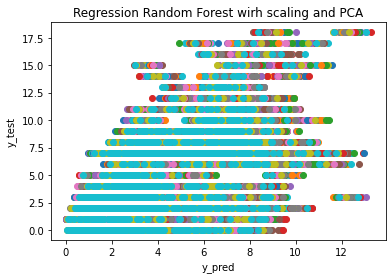

In [ ]:
#Regeression Random Forest wirh scaling and PCA
y_pred=[]
y_reg=[]
a=0
b=0
for i in range(1,51):
    reg1_2=RandomForestRegressor()
    reg1_2.fit(x1,y_train)
    y_pred=reg1_2.predict(x2)
    plt.scatter(y_pred,y_test)
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Regression Random Forest wirh scaling and PCA')
    #plt.savefig('Regression Random Forest wirh scaling and PCA')
    a=np.sum(y_pred>=y_test)
    if (a>b):
        y_reg=y_pred
        b=a
    a=0
print(b)
print(y_reg)
y_all.append(y_reg)

776
[ 4  1  2  4  0  0  9  7  4  4  1  1  8  2  1  7  4  2  7  0  7  4  7  7
  0  7  4  2  2  0  3  0  0  8  7  7  0  7  0  3  7  4  7  8  1  1  3  9
  9 15  7  7  7  3  0  2  3  4  0  8  0  7  7  0  7  2  4  4  7  7  2  7
  0  4  7  7  4  7  7  8  7  0  1  7  1  0  9  0  7  7  2  0  7  7  4  0
  4  7  7  0  7  1  4  9  2  1  9  3  7  7  1  2  7  2  1  4  2  4  3  2
  4  7  4  0  7  8  2  7  8  7  0  0  7  3  1  2  1  7  0  7  1  8  7  4
  2  1  1  3  2  0  7  1  4  4  4  3  4  7  9  8  7  7  4  2  7  4  3  2
  0  4  2  7  2  4  2  4  0  7  7  8  7  7  7  3  7  2  7  7  2  0  7  7
  8  4  9  2  7  7  7  3  2  2  0  7  7  2  0  7  2  2  7  4  4  3  2  7
  7  0  1  7  3  7  1  7  7  7  7  9  1  4  0  7  7  7  3  7  7  7  8  7
  7  7  7  4  7  7  3  1  7  8  0  3  7  0  7  7  7  1  8  7  7  4  2  7
  1  7  7  4  7  4  7  4  3  4  8  8  7  3  7  1  2  3  0  7  4  2  3  8
  3  7  8  7  7  1  2  0  7  1  2  4  7  1  2  8  0  0  7  7  4  2  3  0
  7  2  4  0  1  4  7  7  2  7  3  0  1  7  7  

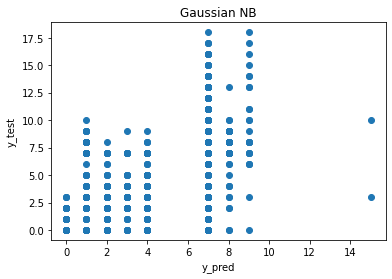

In [ ]:
#Gaussian NB
y_pred=[]
a=0
clf1 = GaussianNB()
y_pred = clf1.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Gaussian NB')
#plt.savefig('Gaussian NB')
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

578
[0 2 2 4 0 0 7 7 2 4 0 2 8 0 0 7 0 0 2 0 7 2 7 2 4 7 2 2 2 2 8 0 0 7 7 7 4
 2 0 2 7 3 7 1 1 7 2 7 7 7 7 7 2 0 3 2 2 4 0 7 0 7 7 2 0 2 4 2 7 2 2 7 3 0
 7 7 2 2 7 8 3 0 7 7 0 0 9 7 2 2 0 0 7 7 0 2 4 2 3 0 7 0 7 7 2 0 2 2 3 3 2
 3 8 8 2 3 0 2 7 7 0 2 4 4 7 2 3 7 4 7 2 3 7 2 0 0 0 7 2 7 7 8 7 0 2 4 0 2
 2 0 7 0 0 3 1 3 3 7 7 0 7 7 3 0 7 2 2 7 0 2 0 2 0 4 0 4 0 7 7 8 2 0 7 4 4
 0 0 7 2 0 7 7 8 0 7 2 7 7 7 3 2 2 0 7 7 0 2 2 2 2 7 0 0 3 0 2 0 2 0 8 0 7
 4 7 7 7 7 7 0 2 0 2 2 7 3 2 2 7 8 7 7 8 7 0 2 2 2 1 4 8 0 2 7 0 7 7 7 7 8
 2 7 4 2 7 0 2 7 4 7 2 7 4 7 2 2 7 7 3 0 0 7 0 0 9 7 0 7 8 2 2 2 7 2 0 2 0
 3 0 0 1 0 2 3 8 7 0 7 0 4 0 2 0 7 0 0 0 2 2 7 4 4 7 3 0 2 8 7 2 2 2 2 0 0
 2 3 4 7 4 7 0 7 7 2 2 2 7 0 2 3 0 7 3 7 0 7 0 0 0 7 7 7 7 7 2 0 4 0 7 7 7
 0 7 0 7 7 7 7 7 7 2 7 2 9 7 0 2 2 7 0 4 2 7 7 7 2 7 0 7 2 7 2 4 0 7 2 2 0
 7 2 4 4 7 0 0 2 2 2 7 3 0 4 3 2 2 7 7 4 9 4 7 7 2 2 2 0 0 8 4 2 4 0 0 7 7
 7 4 7 3 2 4 7 0 2 2 3 2 2 2 0 7 7 7 0 8 7 0 2 7 0 0 2 0 7 1 2 2 7 0 3 4 0
 7 0 0 7 4 2 2 2 7 2 

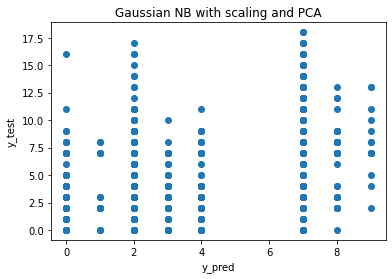

In [ ]:
#Gaussian NB with scaling and PCA
y_pred=[]
a=0
clf1_2 = GaussianNB()
y_pred = clf1_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Gaussian NB with scaling and PCA')
#plt.savefig("Gaussian NB with scaling and PCA ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

758
[ 0  0  0  3 13  0 15  1  0  4  0 13  6  0 13  8  9  7 12  0  9  4 10 15
 13  3  0  0  0  3  6  0  0 10  1 13  4  3 13  6  6  0 15  8  3  8 10  5
 13 15 10  6 15  2  7 13  0 13  0  9  0  0  0 14 12  7  4  0 14  4  2  3
  0  0  4 15  8  3 10  0  5  3 12  5  0  0  7  3  6  9  0  0  2 15  0  3
  7 10  7  6 15  0  7 10  0  0  9  3  9  7 13  9 13  4  7 13  9  0  0  4
 13 15 13  0  8  8  0  2  5  0  7  1  9  0  0 13  7 12  0  6  7  6  8  2
  0  0  4  8  4  2 10 13  7 13  9  0  8 10 15  8 15 10  0 13 15  0  4  3
  6  6  7  2  8  0  0  1  1  8  7  8  8 15  5  3  8  0 15 15  6  2  9  6
  6  6 10  0 15 10 15  0  0  1  0  0 15  6  0  2  0  6  9  0  4  8  8  4
 10  0  0  3  0 15  6 13  0  9  0 15  8  4  1 15  8  4  0 15 15  0  0  4
  0  0  4  8 14  0  8  0 15  6  7  3 15  0  6  5  6  6  4 12  4  7 12  2
  4 12 10  2  8  0  0  6  9  7  7  5 15  9  6  9  4  3  6  7  5  7  9  6
  2 14  2 14  7  0  5  0 15  2  0 13 12  1  8  2  1  7  9 10  0  6  0  3
 10  4  0  4  0  2  6  1  0  8  8  0  0 15  0  

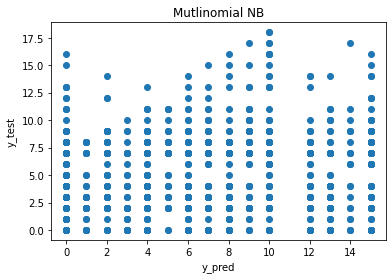

In [ ]:
#Mutlinomial NB
y_pred=[]
a=0
clf2 = MultinomialNB()
y_pred = clf2.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Mutlinomial NB')
#plt.savefig("Mutlinomial NB")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

476
[2.26833733 1.43498271 1.60367377 1.62523119 1.55417204 1.35894823
 5.37643262 2.45096867 1.14226298 2.16107375 1.39119578 1.64027704
 5.48542249 1.58197987 1.89295122 5.99452833 2.65020109 2.3811231
 5.11019787 0.71491914 7.97842767 2.98916987 5.80659948 6.38915252
 1.73705488 2.91607428 1.06595368 1.29323138 1.26669907 1.72940914
 3.42832596 1.16087647 1.11660173 5.12578087 2.18708099 2.53653576
 1.72271042 2.54547304 1.78385463 3.42224006 5.57582383 1.84964027
 6.4540913  4.95288036 1.87642165 3.32900274 3.7617633  3.36570929
 1.80525481 7.29574595 4.58334759 5.68477443 6.17926064 2.79570461
 4.46786098 1.67013354 2.38178692 1.97803675 1.16444612 3.65934499
 1.44512678 1.96118141 1.93253954 6.39216301 5.14161419 2.75666634
 2.43065355 1.59400294 4.78728064 2.55410379 1.96374435 3.14870535
 1.42963294 1.00479096 1.961988   6.60455012 3.14736718 2.31217236
 6.02777002 2.20974383 5.25707112 2.28948738 2.45548654 5.2980981
 1.28149659 1.40965431 2.49224778 2.45560909 6.50784201 8.00

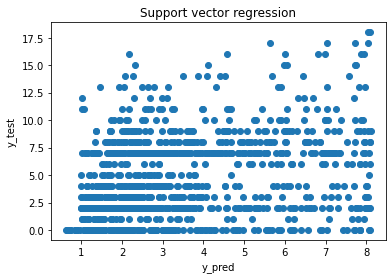

In [ ]:
#SVR
y_pred=[]
a=0
reg2= SVR(kernel='rbf')
reg2.fit(x_train,y_train)
y_pred=reg2.predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Support vector regression')
#plt.savefig("SVR ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

456
[ 3.56515546  1.77668382  2.43942025  3.27588212  2.31508006  0.78999424
  3.30547658  4.49796521  2.42879189  3.91529969  1.98491749  2.07928478
  4.01694031  2.55482277  1.3854803   5.13577257  1.864661    2.27574446
  3.79547058  0.16837249  3.8868622   4.42835057  6.55092378  3.75089843
  1.48136254  2.9791439   4.26481091  2.71560511  2.01392988  1.23188744
  3.34416498  1.07253735  0.89450554  4.92172779  5.11227866  4.38049924
  0.93892585  4.73895093  1.21170491  2.87188932  2.98124984  1.21686865
  3.82365407  4.25221252  2.04801046  3.34583998  2.68557415  4.08968779
  5.15357744  3.94161743  6.11328962  5.56213854  3.5091655   1.50204107
  2.11190599  1.85718086  3.73929777  2.01500769  0.52925603  4.24959446
  1.35666609  3.58403374  6.09203369  3.11186756  3.32273564  2.78281954
  3.16849028  2.03465957  4.4150405   3.68091469  1.91992424  2.91831324
  1.03484369  2.47779121  5.15723857  5.22165693  3.6189047   4.3394324
  4.91516282  5.74796298  3.30254289  2.5236651 

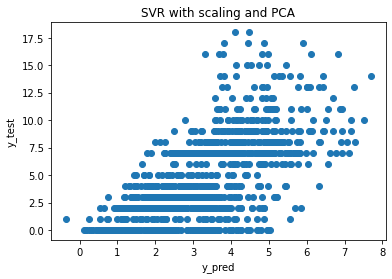

In [ ]:
#SVR with scaling
y_pred=[]
a=0
reg2_2= SVR(kernel='rbf')
reg2_2.fit(x1,y_train)
y_pred=reg2_2.predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('SVR with scaling and PCA')
#plt.savefig("SVR with scaling and PCA ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


545
[ 2  0  0  0  0  0  7  2  0  2  0  0  7  2  0  7  7  2  7  0  8  2 10  7
  0  0  2  0  0  0  2  0  0  8  2  2  2  2  0  2  7  0  7  7  0  2  8  7
  2  7  2  7  7  2  2  2  0  0  0  7  0  0  0 14  7  2  2  0  7  2  0  2
  0  0  2  7  2  0  9  0  7  0  7  7  0  0  2  2  7  9  0  0  2 14  0  0
  2  8  2  2  7  0  2 10  0  0  7  2  7  2  0  7  2  2  2  0  7  0  0  2
  0  7  0  0  2  2  0  2  2  0  2  0  7  2  0  0  2  2  0  7  2  7  7  2
  0  0  2  2  2  2 10  0  2  2  2  0  2 15 15  7 15 10  0  0  7  2  2  2
  2  2  2  2  2  0  0  2  2  7  2  2  7  7  2  2  2  2  7 14  2  2  7  2
  7  2 10  0  7  9  7  0  0  2  0  0 14  7  0  2  0  2  7  0  2  2  2  2
  8  0  0  0  0  7  2  0  2  7  0  7  0  2  0  7  2  2  0  7  7  2  2  2
  2  0  2  2  7  0  2  0  7  2  2  2  7  0  2  7  7  2  2  2  2  2  2  2
  2  7 10  2  7  0  2  2  7  2  2  7  7  7  7  2  2  2  7  2  2  2  7  2
  0  7  2  7  2  0  2  0  7  2  0  2  7  2  2  2  2  2  7  7  0  0  0  0
  8  2  0  2  0  2  7  2  2  7  2  0  0 10  0  

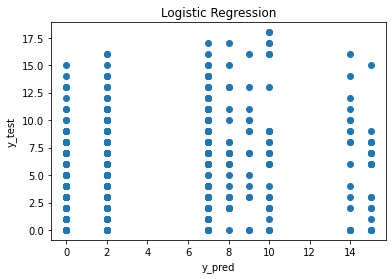

In [ ]:
#Logistic Regression 
y_pred=[]
a=0
reg3= LogisticRegression(solver = 'lbfgs',max_iter=400)
reg3.fit(x_train,y_train)
y_pred=reg3.predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Logistic Regression')
#plt.savefig("Logistic Regression ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

650
[ 2  2  2  4  4  0  2  7  1  7  1  1  8  2  1  7  0  2 15  0 10  2  7  2
  0  0  7  2  2  0  1  0  0  8  7  7  0  7  0  2  0  0 15  1  2  7  2  7
 13 15  8  7  2  2  0  2  3  2  0  2  0  2  8  0  0  2  4  2  7  7  2  3
  0  4  7  7  4  3  7  8  0  1  1  9  2  0  7  0  2  0  0  0  7  7  1  0
  8  8  8  0  7  3  2 15  2  4  9  2  4  7  1  0  8  1  7  2  7  2  7  2
  2  2  2  0  8  7  3  7  8  2  0  2  7  2  3  1  1  7  2 10  2  8  7  2
  2  3  7  2  2  4  7  4  4  4  4  2  2 10 15  2  7 10  2  1  7  2  2  2
  0  3  0  2  2  4  2  4  0  0  7  8 15  0  7  2  4  2  0  7  2  0  7  8
  8  4  7  2 10  7  7  2  2  2  0  3  7  0  2  2  2  0  7  4  0  2  2  7
 15  0  2  1  2  7  0  7  1  7  8 10  1  2  0  0  3  7  3  0  0  7  7  7
  7  8  0  0  0  2  3  2  8  8  0  2  7  0  8  7  7  1  8  0  7  2  2  7
  2  7  7  7  7  2  7  8  7  2  8  7 14  3  0  7  2  2  0  9  7  2  2  8
  3  2  2  7  8  1  2  0  0  1  2  1  0  2  1  8  0  0  7  0  2  2  4  0
  7  2  0  0  2  7  0  4  4  7  2  0  2  8  7  

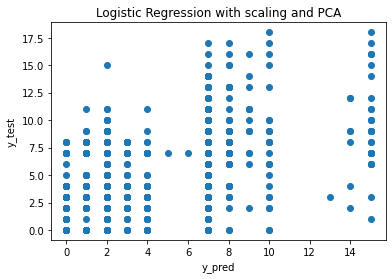

In [ ]:
#Logistic Regression with scaling
y_pred=[]
a=0
reg3_2= LogisticRegression(solver = 'lbfgs',max_iter=400)
reg3_2.fit(x1,y_train)
y_pred=reg3_2.predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Logistic Regression with scaling and PCA')
#plt.savefig("Logistic Regression with scaling and PCA ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

594
[ 2.46924472  1.48210949  2.13575111  2.216962    2.13235326  1.94757444
  5.56181214  3.00616384  1.63383148  2.72089484  1.94772241  2.19808099
  5.70248791  2.14424539  2.41580361  7.6849732   3.08596798  2.89048094
  6.04435897  0.88553721 10.13902341  3.51734761  6.30501539  9.36399168
  2.23862936  3.46020772  1.54703481  1.42457375  1.8268735   2.31877606
  3.852706    1.72486062  1.40395946  5.50764971  2.74223358  3.05873558
  2.28961782  3.04347691  2.23075427  3.84348605  5.76552103  2.19412249
  7.11955684  5.20726892  2.44005599  3.74850166  4.18448905  3.79113154
  2.26511386  9.61850581  5.00990777  5.87526534  7.48927229  3.27128333
  5.07728709  2.13722393  2.65129306  2.4397912   1.53706548  4.02492431
  1.61263894  2.36886538  2.17821663  7.01973276  6.63243981  3.25806885
  2.98542257  1.27620006  5.37017523  3.10128162  2.49166926  3.70006346
  1.98769271  1.33113615  2.51771086  7.20157908  3.58039914  2.80731727
  6.45241179  2.44566168  6.64916944  2.8347036

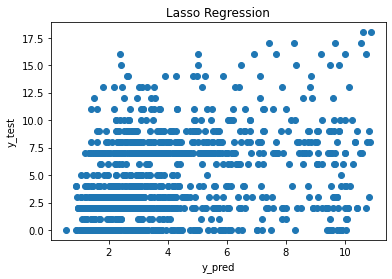

In [ ]:
#Lasso
y_pred=[]
a=0
reg4 = Lasso(alpha=110)
y_pred = reg4.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Lasso Regression')
#plt.savefig("lasso Regression ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

597
[3.06277793 2.56853782 2.53261753 2.50786802 2.60359542 1.79378014
 3.42954566 3.97223366 2.51198338 2.83770613 2.52327623 2.27628793
 4.09369688 2.50635894 1.84856592 5.95203966 2.4438918  2.64205162
 4.64638146 1.73638463 5.68084832 4.01737583 5.28004399 5.1837638
 2.2083373  3.33046253 2.58606939 2.65619372 2.7105015  2.52437894
 3.34556419 2.0176626  1.99946356 3.70121068 2.81507929 3.72188863
 2.25937148 3.68227738 2.13884262 3.50713517 3.51034155 3.20429306
 4.91425757 3.93468147 2.55065976 2.92275492 3.26316114 3.51379986
 3.37900476 6.52887052 5.24162796 4.62259629 4.61810142 2.89447194
 3.37554348 2.45143535 3.794614   2.34359496 1.98601997 3.26150826
 2.39100677 3.22731363 3.95776213 4.18356537 4.22677786 2.92685196
 2.91376644 2.35818427 4.23576009 3.54709291 3.00922903 4.07487972
 2.10146545 2.64451975 3.83331902 5.14884383 3.51768663 3.63947351
 4.3662903  3.76880662 4.69527461 2.89485524 3.15375648 5.8968681
 2.96947914 1.95887816 3.4754012  3.04368671 5.19694063 5.39

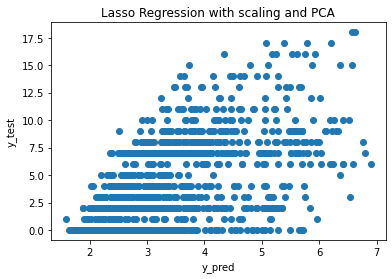

In [ ]:
#Lasso with PCA and scaling
y_pred=[]
a=0
reg4_2= Lasso(alpha=3)
y_pred = reg4_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Lasso Regression with scaling and PCA')
#plt.savefig("Lasso Regression with scaling and PCA ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

584
[ 2.62641903  1.12703225  2.18364868  2.10150938  1.8801893   1.66127328
  5.87908194  2.75170887  1.57470571  2.99517932  1.96311473  1.94272753
  5.4874261   2.31529355  2.27157267  7.53020632  3.30699062  2.95387234
  6.22241235  0.98790009 10.05353434  3.52563774  6.54913832  9.46892499
  2.18369985  3.13066392  1.79614547  1.12765356  1.76577112  2.26870129
  3.74628843  1.84823921  1.13155856  5.49972915  2.76960604  2.94046659
  2.45200548  2.81179759  2.04631717  3.57681628  5.69183962  1.83734682
  7.30260665  5.22058863  2.24826954  3.83032136  4.09834681  3.97036724
  2.33832425  9.62809556  4.79668007  5.74733244  7.51381472  3.04106596
  4.83388538  2.20118841  2.38669771  2.21439976  1.34265191  4.17010297
  1.83308029  2.33290716  2.11452723  7.34635856  6.81349085  3.19586341
  2.93463928  0.98326549  5.68883874  3.17969005  2.28801785  3.3899224
  2.08766627  1.42596869  2.7130107   7.38410603  3.67443122  2.5188634
  6.62200347  2.23833327  6.46673509  2.5483932  

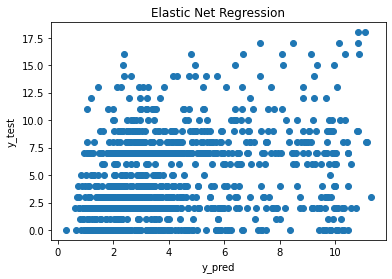

In [ ]:
#Elastic Net
y_pred=[]
a=0
reg5 = ElasticNet(alpha=25)
y_pred = reg5.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Elastic Net Regression')
#plt.savefig("Elastic Net Regression  ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)



580
[3.12868471 2.43063476 2.37990201 2.34494654 2.48014906 1.33639016
 3.64669649 4.41317281 2.35075896 2.81080003 2.36670864 2.01786974
 4.58472382 2.34281517 1.41376796 7.20939164 2.25458843 2.53446344
 5.36531901 1.25532646 6.82636909 4.47693026 6.26028504 6.12430177
 1.9218983  3.50675445 2.45539582 2.55443733 2.63114002 2.36826607
 3.52808357 1.65259506 1.62689128 4.03038805 2.77884256 4.05959297
 1.99397746 4.00364722 1.82374609 3.75628159 3.7608102  3.32855645
 5.74365922 4.36013521 2.40538431 2.9309204  3.41169998 3.76569461
 3.57531403 8.0240903  6.20602737 5.33172554 5.32537713 2.89097436
 3.57042543 2.26524272 4.1623081  2.11293218 1.60790395 3.40936549
 2.1798952  3.36107002 4.39273365 4.7116514  4.77268343 2.93670694
 2.91822533 2.13353768 4.78536966 3.81271671 3.05305385 4.55814703
 1.7709557  2.53794936 4.21697392 6.07498184 3.77118417 3.94319232
 4.96972663 4.12585854 5.43437424 2.89151573 3.25718009 7.13146897
 2.99691229 1.56956967 3.71146149 3.10172084 6.14291233 6.

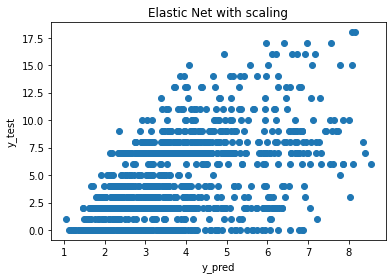

In [ ]:
#Elastic Net with scaling
y_pred=[]
a=0
reg5_2 = ElasticNet(alpha=2.5)
y_pred = reg5_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Elastic Net with scaling')
#plt.savefig("Elastic Net with scaling ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

514
[ 4.63707180e+00  1.73008381e+00  2.41977777e+00  4.29255029e+00
  1.03684077e+00  1.18880747e+00  4.48890507e+00  4.98694393e+00
  2.76769398e+00  5.43781211e+00  2.22590031e+00  2.64579220e+00
  5.50040286e+00  2.76225930e+00  5.75227777e-01  9.85509719e+00
  1.57170942e+00  1.75462382e+00  1.22201080e+01 -6.16374876e-01
  6.86259018e+00  4.36419843e+00  1.25035899e+01  2.13856987e+00
  1.23892629e+00  3.64546071e+00  6.29259949e+00  2.93073410e+00
  2.00322208e+00  5.56728235e-01  2.83585094e+00  2.00519639e+00
  9.15446381e-01  5.21846825e+00  6.43729945e+00  6.43897981e+00
  2.25591089e-01  6.54689299e+00  1.13456250e+00  3.98358273e+00
  2.58116553e+00  1.17449704e+00  1.42353049e+01  5.04215501e+00
  2.16496439e+00  4.49356869e+00  4.67240973e+00  5.94931549e+00
  6.61072194e+00  1.54959075e+01  9.08965739e+00  8.83971100e+00
  2.52452931e+00  1.99507797e+00 -8.09405870e-01  1.27515252e+00
  3.24469895e+00  2.24046248e+00  2.93692529e-01  4.69454998e+00
  9.49619665e-01  5.3

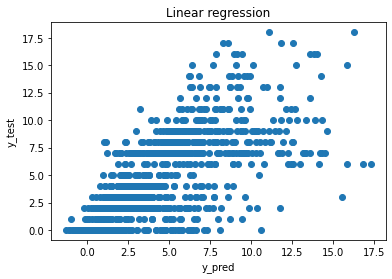

In [ ]:
#Linear regression

y_pred=[]
a=0
reg6 = LinearRegression()
y_pred = reg6.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Linear regression')
#plt.savefig("Linear regression ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

485
[ 4.45641066e+00  1.98717481e+00  2.46449850e+00  3.96569676e+00
  1.66535829e+00  5.87449488e-01  3.65037849e+00  4.63318852e+00
  2.64715963e+00  5.10536258e+00  2.61517045e+00  2.35995573e+00
  5.84615268e+00  2.57024049e+00  2.49053907e-01  8.35908009e+00
  1.21087554e+00  2.26775046e+00  8.79330611e+00 -4.72738991e-01
  7.97873430e+00  4.49613504e+00  1.12179080e+01  3.23623095e+00
  1.30639710e+00  2.94304219e+00  5.28664124e+00  2.83747422e+00
  2.03665505e+00  4.57764203e-01  2.56145399e+00  2.02805741e+00
  7.00341363e-01  4.31939065e+00  6.59750274e+00  6.59598713e+00
  3.35379055e-01  5.37225991e+00  8.36333744e-01  3.37087855e+00
  2.52951979e+00  8.79902970e-01  1.13692485e+01  4.20915043e+00
  2.30502349e+00  3.96846297e+00  3.34177985e+00  6.02530551e+00
  6.87099815e+00  1.43507104e+01  9.07152214e+00  9.38650015e+00
  3.17006509e+00  1.22092138e+00  1.87501835e+00  1.25073853e+00
  3.53718585e+00  2.07523200e+00  5.30194461e-01  4.45979217e+00
  1.04784574e+00  4.2

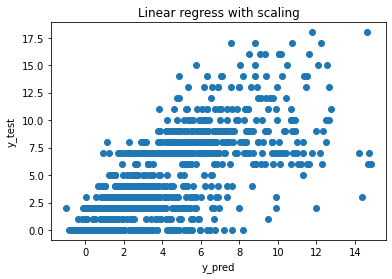

In [ ]:
#Linear regress with scaling

y_pred=[]
a=0
reg6_2 = LinearRegression()
y_pred = reg6_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Linear regress with scaling')
#plt.savefig("Linear regress with scaling ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

581
[ 2.91100524  1.33318227  2.26917554  2.20357001  1.93831853  1.48564222
  5.86175081  2.75252291  1.56049334  3.18709136  2.12622592  1.73947418
  5.43993743  2.35340872  1.92557998  7.75736186  3.37265832  2.72876559
  6.26170683  0.75738185  9.92224637  3.69080012  7.03545967  8.93997738
  2.08939131  3.20598969  1.99282712  1.2794041   1.65123014  2.13140607
  3.80203524  1.77393588  1.2120319   5.48423908  3.04855526  3.03932655
  2.34991357  2.8776571   2.08262745  3.50549962  5.37558784  1.74535645
  7.20031215  5.09224916  2.2991063   3.92136916  4.15037029  4.24360309
  2.66520497  9.91986781  5.08524163  5.95498115  7.43644248  2.85615378
  4.74755903  2.1758341   2.658069    2.19215595  1.21187428  4.25334723
  1.88411543  2.57122748  2.66031435  7.05524781  6.69683589  3.19464408
  3.07037492  1.30065294  5.62354616  3.40941338  2.19074382  3.73635974
  1.98761278  1.51192495  2.87832243  7.59568587  3.72448493  2.70100366
  6.80109691  2.38982553  6.28737042  2.5643905

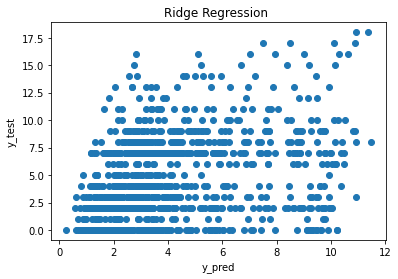

In [ ]:
#Ridge
y_pred=[]
a=0
reg7 = Ridge(alpha=100000)
y_pred = reg7.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Ridge Regression ')
#plt.savefig("Ridge Regression ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

594
[3.4972307  2.62919252 2.3324417  2.9843022  2.46201482 1.53415033
 3.84117608 4.1500922  2.38410703 3.55958795 2.56743128 2.14623368
 4.62963012 2.46136705 1.34991902 6.69586267 2.42361328 2.4955302
 6.08192165 1.29886782 6.52884114 3.84943666 6.92933716 4.85156386
 2.03859421 3.35274742 3.2286899  2.73864406 2.43264637 2.08028592
 3.20084652 1.9106157  1.73193042 3.9580868  3.96342735 4.20633766
 1.95338546 3.82692408 1.9577873  3.34037733 3.31771886 2.43629929
 6.89559342 3.98529644 2.53354615 3.33507853 3.33297244 4.24876675
 4.48411189 8.79577322 6.08911788 5.99502959 4.55523286 2.5252098
 3.06560887 2.22696626 3.58149392 2.49341951 1.75259025 3.66160653
 2.10501314 3.77823005 4.45224867 4.62151102 4.78637463 2.81192296
 3.0200261  2.54031608 3.70269981 4.03346565 2.72539707 3.89160268
 1.61535519 2.55526864 4.55611283 6.60254904 3.36867116 3.90655579
 5.06903304 4.20146044 5.0548227  2.90992263 2.91977032 7.06648763
 2.66568909 1.69009371 4.73963073 2.45401753 4.95974326 6.41

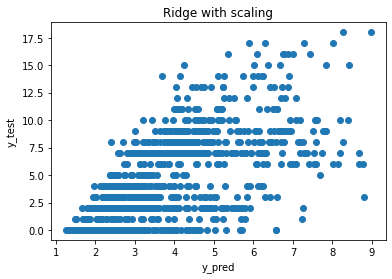

In [ ]:
#Ridge with scaling
y_pred=[]
a=0
reg7_2 = Ridge(alpha=1000)
y_pred = reg7_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Ridge with scaling')
#plt.savefig("Ridge with scaling ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

510
[ 5.1935887   2.71819932  2.18648027  4.1476947   0.78768489  0.73424829
  5.37086356  4.6095462   2.25101573  5.01420812  3.11178846  1.62655775
  6.67453381  3.00189482  0.37482316  9.5723078   2.12741537  2.07001346
  7.33857997 -0.16366687  7.76048064  4.24874897 11.76652621  2.51741588
  0.76271329  2.90459445  4.97860779  2.96600268  1.74497392  0.81601595
  2.93127461  0.83742836  0.81542917  5.40323531  6.03417412  5.79730403
  0.59992109  5.10589202  1.35925937  2.90108421  2.92661375  1.11112552
  9.26410912  5.15278811  2.09294377  4.39630894  4.6753968   6.32791005
  6.47714816 12.25803839  9.05554679  8.96240601  3.27175456  2.7657007
  0.99990028  1.72614174  2.96254405  2.6700368   0.71891524  5.46634128
  0.82512089  5.58076454  7.0021663   1.3187261   3.1960055   2.34177027
  3.45404093  3.35643561  1.31367534  6.27933237  2.81228305  2.3718055
  0.60638279  1.96133455  6.39835509 10.6937191   3.11783552  5.52351368
  5.93519878  5.9898064   2.93566792  2.26496851 

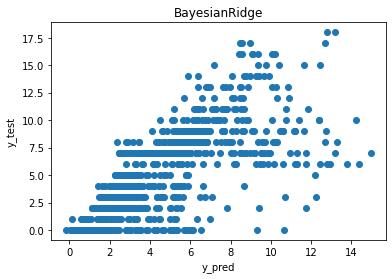

In [ ]:
#BayesianRidge
y_pred=[]
a=0
reg8 = BayesianRidge()
y_pred = reg8.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('BayesianRidge')
#plt.savefig("BayesianRidge ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

516
[ 4.30049562e+00  2.10235486e+00  2.31504537e+00  3.81558821e+00
  1.78050448e+00  6.44230847e-01  3.82937117e+00  4.63536516e+00
  2.48394868e+00  4.91434546e+00  2.57086063e+00  2.22254287e+00
  5.77331251e+00  2.48559049e+00  3.00089461e-01  8.46634620e+00
  1.47444288e+00  2.20688865e+00  8.68727501e+00 -2.86327239e-01
  8.16254278e+00  4.41265102e+00  1.08568022e+01  3.79261115e+00
  1.38984670e+00  3.07449530e+00  4.91727445e+00  2.81049625e+00
  2.06184410e+00  6.54521171e-01  2.76686922e+00  1.89894087e+00
  8.16903546e-01  4.43703759e+00  6.26679596e+00  6.22452800e+00
  5.46051546e-01  5.08811665e+00  9.97818755e-01  3.41540451e+00
  2.70985826e+00  1.08480058e+00  1.09955997e+01  4.28843966e+00
  2.31164750e+00  3.96489213e+00  3.38399756e+00  5.82722320e+00
  6.64306576e+00  1.39773444e+01  8.77146815e+00  9.13519428e+00
  3.72420090e+00  1.36042464e+00  2.10728134e+00  1.37509328e+00
  3.54423468e+00  2.16522038e+00  6.73371730e-01  4.40309634e+00
  1.15396001e+00  4.3

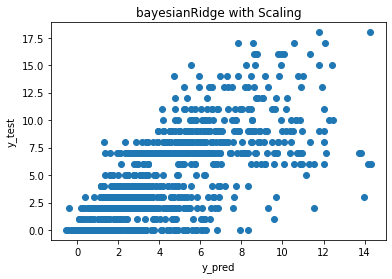

In [ ]:
#bayesianRidge with Scaling
y_pred=[]
a=0
reg8_2 = BayesianRidge()
y_pred = reg8_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('bayesianRidge with Scaling')
#plt.savefig("bayesianRidge with Scaling ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


509
[ 5.62749054  3.72750111  1.36921582  4.76015258  1.06163277  0.59142994
  5.30587362  6.01801323  2.86353458  5.52541993  3.4164591   1.61021349
  6.64458364  3.5508378   0.43971504 11.75014372  1.62228029  2.53059374
  7.08728761  0.16721077  7.6804098   4.50413664 13.0217981   1.62646017
  0.70547874  2.58030065  6.04361611  3.15871636  1.57340594  0.29050787
  2.97970955  0.36154682  0.4149053   4.98194503  6.93907205  6.62544319
  0.84013661  5.56039663  0.70165745  2.41994878  2.49484017  0.86258418
  9.23596699  5.20599436  1.61476366  4.54173728  4.13272579  6.29126022
  7.57899791 13.54922257 11.55012984 10.04747049  2.82580615  2.84956731
  1.85806914  1.72408589  3.19623213  3.13439796  0.5638802   5.7606874
  0.54015129  6.47305026  8.2266962   0.35483941  2.40204488  2.54137654
  4.32501205  3.37617618  1.67407285  7.28015839  2.73037989  4.98118721
  0.10121526  2.73283507  7.70795295 12.32289543  4.18741565  6.20345504
  6.6749096   6.83578613  1.95058687  1.74400206

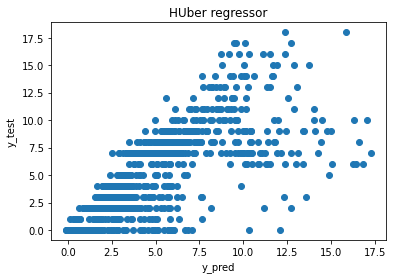

In [ ]:
#HUber regressor
y_pred=[]
a=0
reg9 = HuberRegressor()
y_pred = reg9.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('HUber regressor')
#plt.savefig("HUber regressor ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

514
[ 5.87957897e+00  2.58981642e+00  2.48197582e+00  4.64647575e+00
  1.30185780e+00  4.88001315e-01  4.17635767e+00  5.32964876e+00
  2.67578828e+00  5.42614167e+00  3.62296337e+00  2.09018499e+00
  6.52065296e+00  3.32819210e+00 -2.80851943e-01  8.95759591e+00
  1.49993907e+00  2.03692452e+00  8.52395740e+00 -2.49146049e-01
  7.70302654e+00  4.91510252e+00  1.26288003e+01  2.17892764e+00
  7.35345976e-01  2.53617127e+00  5.58347953e+00  3.28976289e+00
  2.21125240e+00  4.46236772e-01  2.82548773e+00  1.33382514e+00
  3.53737494e-01  4.75108907e+00  7.04106146e+00  7.57675195e+00
  7.39360174e-01  5.88634160e+00  1.03615086e+00  3.20951097e+00
  2.26185512e+00  6.94597253e-01  1.16069934e+01  5.06985287e+00
  2.02890788e+00  4.49105482e+00  3.53064756e+00  6.82294698e+00
  7.95452768e+00  1.46421008e+01  1.05092886e+01  1.00215457e+01
  2.10875010e+00  1.26465495e+00  1.89273460e+00  1.67608761e+00
  4.01460755e+00  2.89756750e+00  2.83655420e-01  5.49226048e+00
  8.95322576e-01  4.8

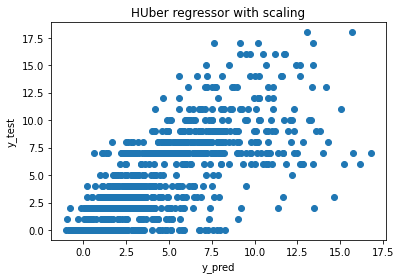

In [ ]:
#HUber regressor with scaling
y_pred=[]
a=0
reg9_2 = HuberRegressor()
y_pred = reg9_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('HUber regressor with scaling')
#plt.savefig("HUber regressor with scaling ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

453
[ 4.84946613e+00  2.47476255e+00  2.23408526e+00  4.48659848e+00
  1.19380507e+00  8.95152310e-01  4.35261601e+00  5.00669840e+00
  2.93426092e+00  5.50206762e+00  1.95377369e+00  2.41812440e+00
  4.87575116e+00  2.75336003e+00  5.10726883e-01  1.02246720e+01
  1.68154651e+00  1.46200222e+00  7.76298733e+00 -6.46324113e-01
  6.86630836e+00  4.86323744e+00  1.32386642e+01 -2.35726655e-02
  1.45094894e+00  3.56939923e+00  6.70798818e+00  2.89942958e+00
  1.94934882e+00  5.65126300e-01  2.73312341e+00  1.70810683e+00
  5.03531634e-01  5.17126258e+00  6.95907800e+00  6.42272167e+00
  1.17250129e-01  6.91853471e+00  9.67221897e-01  3.79832829e+00
  2.36668674e+00  1.33114219e+00  1.00677633e+01  4.91919871e+00
  1.85999781e+00  4.33490096e+00  4.43683418e+00  5.95536671e+00
  6.34338534e+00  1.26555748e+01  1.03562477e+01  9.18092034e+00
  2.29255589e+00  2.20089849e+00 -1.18568366e+00  1.34377024e+00
  3.27321673e+00  2.52829674e+00  2.73060919e-01  4.84062000e+00
  7.09954419e-01  5.7

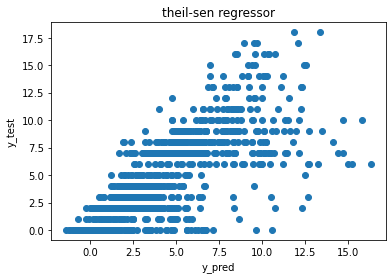

In [ ]:
#theil-sen regressor
y_pred=[]
a=0
reg10 = TheilSenRegressor()
y_pred = reg10.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('theil-sen regressor')
#plt.savefig("theil-sen regressor ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

496
[ 4.70031404e+00  1.97826797e+00  2.40971456e+00  4.58396180e+00
  1.81227955e+00  7.74291607e-01  4.08869845e+00  5.77302096e+00
  2.74698997e+00  5.16483825e+00  2.35900042e+00  2.60701893e+00
  5.48512183e+00  2.58276814e+00  5.26875972e-01  8.38023637e+00
  1.58186114e+00  2.31545651e+00 -4.60747305e+00 -2.50537931e-01
  7.04503231e+00  4.48903980e+00  1.21796100e+01  1.95927837e+00
  1.57909605e+00  3.65285273e+00  6.05938799e+00  3.04576536e+00
  2.49375273e+00  5.40579439e-01  2.80202519e+00  2.03738060e+00
  5.42131851e-01  4.53366457e+00  6.62390079e+00  7.19384029e+00
  4.04768590e-01  6.31720281e+00  1.17883013e+00  3.64650137e+00
  2.79263771e+00  1.14761237e+00 -1.88334868e+00  4.47250986e+00
  2.09895919e+00  4.30454366e+00  4.10097594e+00  6.57298814e+00
  7.28604821e+00 -1.70077679e-01  9.29121183e+00  9.26413769e+00
  2.55402147e+00  1.65491433e+00  7.70055833e-01  1.44647731e+00
  3.86995804e+00  2.50152253e+00  6.02091232e-01  4.64885911e+00
  9.75839421e-01  5.0

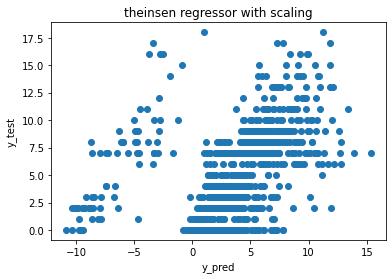

In [ ]:
#theinsen regressor with scaling
y_pred=[]
a=0
reg10_2 = TheilSenRegressor()
y_pred = reg10_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('theinsen regressor with scaling')
#plt.savefig("theinsen regressor with scaling ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

605
[ 1.25000000e+01  4.37500000e+00  4.37500000e+00 -1.50000000e+00
 -8.75000000e-01 -5.00000000e-01  4.00000000e+00  1.38750000e+01
  2.50000000e+00  5.37500000e+00  1.87500000e+00  1.75000000e+00
  9.87500000e+00  8.75000000e-01 -8.12500000e+00  1.77500000e+01
 -3.37500000e+00  8.25000000e+00  1.51250000e+01  6.50000000e+00
 -1.43750000e+01  8.87500000e+00  5.75000000e+00  2.23750000e+01
  6.25000000e-01  6.00000000e+00  2.75000000e+00  3.37500000e+00
  6.25000000e+00  3.00000000e+00 -1.00000000e+00  2.87500000e+00
  8.75000000e-01  2.37500000e+00  1.23750000e+01  1.87500000e+01
  2.00000000e+00  1.41250000e+01 -6.25000000e-01  1.62500000e+01
  5.12500000e+00  1.17500000e+01  1.63750000e+01  5.25000000e+00
 -5.50000000e+00 -7.50000000e-01  6.87500000e+00  1.55000000e+01
  1.98750000e+01  2.66250000e+01  1.48750000e+01  6.75000000e+00
 -1.62500000e+01  5.75000000e+00 -7.25000000e+00  1.10000000e+01
  4.00000000e+00  4.25000000e+00  4.25000000e+00 -1.25000000e+00
 -4.75000000e+00  1.2

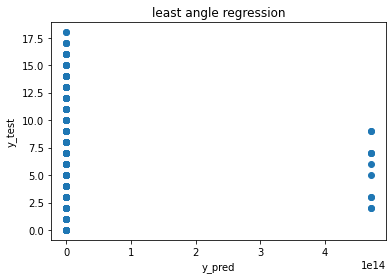

In [ ]:
#Lars 
y_pred=[]
a=0
reg11 = Lars(eps=10e-8)
y_pred = reg11.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('least angle regression')
#plt.savefig("least angle regression ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

485
[ 4.45641066e+00  1.98717481e+00  2.46449850e+00  3.96569676e+00
  1.66535829e+00  5.87449488e-01  3.65037849e+00  4.63318852e+00
  2.64715963e+00  5.10536258e+00  2.61517045e+00  2.35995573e+00
  5.84615268e+00  2.57024049e+00  2.49053907e-01  8.35908009e+00
  1.21087554e+00  2.26775046e+00  8.79330611e+00 -4.72738991e-01
  7.97873430e+00  4.49613504e+00  1.12179080e+01  3.23623095e+00
  1.30639710e+00  2.94304219e+00  5.28664124e+00  2.83747422e+00
  2.03665505e+00  4.57764203e-01  2.56145399e+00  2.02805741e+00
  7.00341363e-01  4.31939065e+00  6.59750274e+00  6.59598713e+00
  3.35379055e-01  5.37225991e+00  8.36333744e-01  3.37087855e+00
  2.52951979e+00  8.79902970e-01  1.13692485e+01  4.20915043e+00
  2.30502349e+00  3.96846297e+00  3.34177985e+00  6.02530551e+00
  6.87099815e+00  1.43507104e+01  9.07152214e+00  9.38650015e+00
  3.17006509e+00  1.22092138e+00  1.87501835e+00  1.25073853e+00
  3.53718585e+00  2.07523200e+00  5.30194461e-01  4.45979217e+00
  1.04784574e+00  4.2

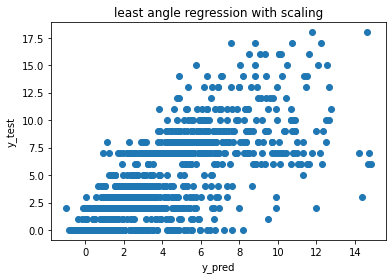

In [ ]:
#lars with scaling
y_pred=[]
a=0
reg11_2 = Lars()
y_pred = reg11_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('least angle regression with scaling')
#plt.savefig("least angle regression with scaling ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

862
[ 4  7  2  7  0  0  7  7  2  7  2  2  8  2  0  7  2  3  7  0  7  8  9  2
  0  2  7  4  2  0  3  0  0  7  7  7  0  7  0  3  2  2  7  7  2  7  7  7
  7 15  7  9  4  3  0  2  3  2  0  7  0  7  7  0  2  2  7  2  0  7  2  4
  0  2  7  7  7  7  9  8  3  2  2  4  2  0  7  0  2  7  2  0  0  4  4  0
  2  9  7  0  7  2  7 15  2  2  9  2  2  7  7  2  1  2  7  4  2  2  7  2
  2  7  4  0  7  7  7  7  8  4  0  0  7  2  2  2  2  4  0  2  7  8  7  4
  2  7  9  3  2  2 10  2  2  2  2  2  2  9  7  8  7  9  7  2  7  7  3  3
  0  7  2  4  2  7  2  7  2  3  8  7  1  0  7  3  7  2  7  7  2  0  7  8
  7  2  9  2  7  7 15  3  2  2  0  2  7  2  2  2  2  2  9  2  2  2  2  7
  7  0  2  7  4  7  0  7  4  6  7 15  2  2  2  2  7  7  3  7  2  7  7  7
  2  2  2  4  2  2  2  2  7  9  0  2  7  0  7  7  7  7  8  7  2  2  2 10
  2  7  9  7  7  2  8  2  7  7  7  8 15  3  2  7  4  2  0  9  2  2  3  7
  4  7  8  7  7  2  2  0  0  2  2  7  0  7  2  7  0  0  7  2  7  2  4  0
  2  2  2  0  4  7  4  7  2  2  4  0  2  8  2  

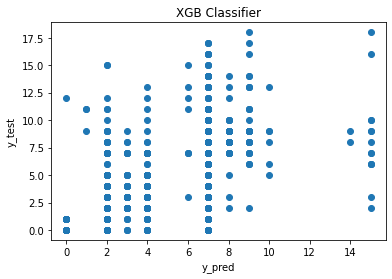

In [ ]:
#XGB
y_pred=[]
a=0
clf3 = XGBClassifier()
y_pred = clf3.fit(x_train, y_train).predict(x_test)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('XGB Classifier')
#plt.savefig("XGB Classifier")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

594
[ 7  2  2  2  4  0  2  0  2  2  2  2  8  2  0 10  4  2 15  0  0  0  7  2
  0  0  2  2  2  2  1  0  0  7  2  2  0  7  0  3  7  3 15  1  2  2  2  2
  2 15  2  7  2  2  0  2  0  2  0  2  2  2  7 15 15  7  7  2  2  7  2  0
  0  0  7  7  2  7  7  7  3  0  2  7  2  0  7  7  0 15  0  0  7  7  0  2
  4  7  7  0  7  7  2 15  2  0  2  2  3  7  7  0  7  2  2  2  2  2  8  2
  2  0  2  0  7  8  2  7  7  7  0  2  7  2  0  2  2  7  2  0  7  8  7  0
  2  2  2  2  2  0  7  2  2  2  2  3  2 10 15  2  7 10  2  7  7  2  2  2
  0  0  2  2  2  7  0  2  2  0  2  2 15  0  7  4  4  2 15  7  2  0  2  7
  7  2  9  0  0 10  7  2  2  2  0  7  7 15  2  2  2  0  7  0  0  0  2  2
 15  0  2  7  2 10  0  7  7  7  7 10  2  0  0  2  7  7  0 15 15  7  7  7
  2  2  0  0 15  7  2  2  4  7  0  0  7  0  7  7  7  2  7  2  7  2  2  7
  0  2  7  7  7  0  7  8  7  2  2  7 10  3 15  2  2  2  0  7  7  2  7  2
  0 15  7  7  7  0  2  0 15  2  0  2  0  2  2  8  7  2  7  0  2  0  2  2
  0  0  2  0  2  2  0  4  2  2  2  0  2  8  7  

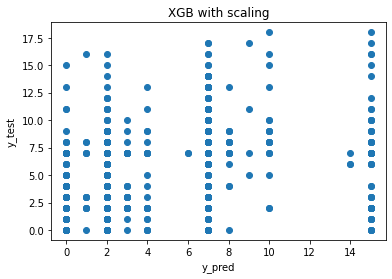

In [ ]:
#XGB with scaling
y_pred=[]
a=0
clf3_2 = XGBClassifier()
y_pred = clf3_2.fit(x1, y_train).predict(x2)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('XGB with scaling')
#plt.savefig("XGB with scaling ")
a=np.sum(y_pred>=y_test)
print(a)
print(y_pred)
y_all.append(y_pred)

In [ ]:
#Initialising Tensors
X_train=torch.DoubleTensor(x_train.values)
Y_train=torch.DoubleTensor(y_train).resize_((len(y_train),1))
X_Test=torch.DoubleTensor(x_test.values)

#criterion is taken as MSE loss according to problem statement.
criterion = torch.nn.MSELoss()

class Model_Bit(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.REG=nn.Sequential(
                nn.Linear(x_train.shape[1],128),
                nn.ELU(),
                nn.Linear(128,32),
                nn.ELU(),
                nn.Linear(32,8),
                nn.ELU(),
                nn.Linear(8,1))
        
    def forward(self, x):
        x = self.REG(x)
        return x
#initialising model
model=Model_Bit()
model.train()
print('Model loaded')

#Taking the Optimizer Adabound which is much better than existing pre-defined optimizers in pytorch library.
optimizer = torch.optim.Adam(model.parameters())

Model loaded


In [ ]:
torch.manual_seed(5)
a=0
pred=[]
for epoch in range(1,2001):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, Y_train)
    y_val = model(X_Test)

    loss_val= np.sum(y_val.detach().numpy()[:,0]>=y_test)
    if epoch % 20==0:
        print(' epoch: ', epoch,' loss: ', loss.item(),' valscore :',loss_val)
    if a<loss_val and epoch>100:
        a=loss_val
        pred=y_val.detach().numpy()[:,0]
    loss.backward()
    optimizer.step()
print(a)
y_all.append(pred)

 epoch:  20  loss:  10.96746355706317  valscore : 487
 epoch:  40  loss:  8.686881801169687  valscore : 388
 epoch:  60  loss:  7.057685442456184  valscore : 518
 epoch:  80  loss:  6.738260532670183  valscore : 518
 epoch:  100  loss:  6.540786163240045  valscore : 547
 epoch:  120  loss:  6.38909020294068  valscore : 552
 epoch:  140  loss:  6.265596590171193  valscore : 551
 epoch:  160  loss:  6.149442596132093  valscore : 550
 epoch:  180  loss:  6.032246697015166  valscore : 548
 epoch:  200  loss:  5.917613234003508  valscore : 550
 epoch:  220  loss:  5.804133121082168  valscore : 550
 epoch:  240  loss:  5.690717238250593  valscore : 550
 epoch:  260  loss:  5.576916260254406  valscore : 552
 epoch:  280  loss:  5.462409354257367  valscore : 554
 epoch:  300  loss:  5.34774475596425  valscore : 558
 epoch:  320  loss:  5.232886821839182  valscore : 555
 epoch:  340  loss:  5.118485289363467  valscore : 552
 epoch:  360  loss:  5.004925857534829  valscore : 553
 epoch:  380  lo

In [ ]:
#Initialising Tensors
X_train=torch.DoubleTensor(x_train.values)
Y_train=torch.DoubleTensor(y_train).resize_((len(y_train),1))
X_Test=torch.DoubleTensor(x_test.values)

#criterion is taken as MSE loss according to problem statement.
criterion = torch.nn.MSELoss()

class Model_Bit2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.REG=nn.Sequential(
                nn.Linear(x_train.shape[1],64),
                nn.SELU(),
                nn.Linear(64,16),
                nn.SELU(),
                nn.Linear(16,6),
                nn.SELU(),
                nn.Linear(6,1))
        
    def forward(self, x):
        x = self.REG(x)
        return x
#initialising model
model2=Model_Bit2()
model2.train()
print('Model loaded')

#Taking the Optimizer Adabound which is much better than existing pre-defined optimizers in pytorch library.
optimizer = torch.optim.Adam(model2.parameters())

Model loaded


In [ ]:
torch.manual_seed(5)
a=0
pred=[]
for epoch in range(1,2001):
    optimizer.zero_grad()
    y_pred = model2(X_train)
    loss = criterion(y_pred, Y_train)
    y_val = model2(X_Test)
    loss_val= np.sum(y_val.detach().numpy()[:,0]>=y_test)
    if epoch % 20==0:
        print(' epoch: ', epoch,' loss: ', loss.item(),' valscore :',loss_val)
    if a<loss_val and epoch>100:
        a=loss_val
        pred=y_val.detach().numpy()[:,0]
    loss.backward()
    optimizer.step()
print(a)
y_all.append(pred)

 epoch:  20  loss:  29.643717584944135  valscore : 515
 epoch:  40  loss:  24.63610639256975  valscore : 583
 epoch:  60  loss:  16.630070955263562  valscore : 287
 epoch:  80  loss:  15.414518838881394  valscore : 421
 epoch:  100  loss:  14.05069202691064  valscore : 379
 epoch:  120  loss:  13.504002852237967  valscore : 402
 epoch:  140  loss:  12.986531786555766  valscore : 404
 epoch:  160  loss:  12.618139719940963  valscore : 401
 epoch:  180  loss:  12.108142564487295  valscore : 409
 epoch:  200  loss:  11.885382646877297  valscore : 417
 epoch:  220  loss:  11.70440870817902  valscore : 427
 epoch:  240  loss:  10.563509219501977  valscore : 432
 epoch:  260  loss:  9.806655242871036  valscore : 436
 epoch:  280  loss:  9.413242813915742  valscore : 447
 epoch:  300  loss:  9.293220001386253  valscore : 461
 epoch:  320  loss:  9.176833439798454  valscore : 458
 epoch:  340  loss:  9.096125930547418  valscore : 464
 epoch:  360  loss:  9.021730710703249  valscore : 464
 epoc

In [ ]:
# mode of all values is selected as basic prediction of tenure for model 1
for j in range(0,len(y_test)): 
    a=[]
    for i in range(1,len(y_all)):
        if y_all[i][j]>y_test.iloc[j]:
            a.append(y_all[i][j])
    #print(a)
    if len(a)>0:
        print(y_test.iloc[j])
        print(np.mean(a),np.median(a),stats.mode(a)[0],np.min(a))

7
10.609438472537153 10.609438472537153 [8.71887695] 8.718876945074307
2
2.624240129919519 2.41474616437661 [2.08] 2.08
0
2.4605605681786282 1.9092539135327096 [4.] 0.44
0
1.1201551803132992 0.8951523101190024 [0.16] 0.16
7
10.643327285322385 9.0 [7.92998186] 7.929981855967156
7
10.57170642056469 10.57170642056469 [7.26841284] 7.268412841129379
4
4.4911065244479005 4.4911065244479005 [4.49110652] 4.4911065244479005
5
5.720025807042872 5.426141670291255 [7.] 5.014208123682341
2
2.910748375811648 2.6151704454062035 [2.12622592] 2.1262259176217095
2
3.027980750733464 2.276287931640741 [2.01786974] 2.0178697443786917
9
9.726251703505636 9.726251703505636 [9.57750341] 9.577503407011271
2
2.832607627735496 2.5765043187038996 [2.14424539] 2.1442453915443913
0
1.5894070753310607 1.1348348294618442 [1.] 0.05
8
10.190702360867803 9.713702493881923 [8.35908009] 8.359080094712258
2
3.7131629238667827 3.3069906169885677 [4.] 2.1274153709238393
2
3.0776305507822146 2.5325285919619267 [2.03692452] 2.

In [ ]:
#either mode is considered if it exists or deafult value of tenure is accepted.
tenure_model1=[]
for j in range(0,len(y_test)): 
    a=[]
    for i in range(1,len(y_all)):
        if y_all[i][j]>y_test.iloc[j]:
            a.append(y_all[i][j])
    #print(a)
    if len(a)>0:
        tenure_model1.append(stats.mode(a)[0][0])
    else:
        tenure_model1.append(y_test.iloc[j])
print(tenure_model1)

[8.718876945074307, 7, 2.08, 7, 4.0, 0.16, 7.929981855967156, 7.268412841129379, 4.4911065244479005, 7.0, 2.1262259176217095, 2.0178697443786917, 9.577503407011271, 2.1442453915443913, 1.0, 8.359080094712258, 4.0, 2.0369245226578294, 7.0, 0.16721076527940285, 13.540012928330029, 7.880843056602174, 7.0, 7.0, 1.2389262873696183, 7.0, 2.0, 3.0457653571262444, 2.003222077346575, 2.0, 3.12, 0.01, 0.03, 10, 8.206059928436087, 7.0, 2.0, 7.0, 0.01, 3.209510974567258, 7.0, 3.0, 15.0, 8, 2.0289078825637725, 8, 5.529338940265071, 9.0, 7.0, 15.0, 16, 14.844848444755245, 2.0, 5.75, 0.15, 2.1372239305756895, 3.196232126419844, 4.25, 1.16444611708291, 7.0, 0.5401512856106876, 8.002274581794339, 18.375, 14.0, 7.0, 7.0, 8, 6.792947848725635, 7.0, 11, 2.148259450373134, 7.0, 0.10121525578334586, 4.0, 19.25, 7.0, 8.0, 8, 9.125, 9.562627189289941, 7.0, 2.2649685066425227, 7.0, 10.17478929548734, 2.09, 0.05643374159067538, 13, 7.0, 7.0, 7.0, 2.047335649151071, 0.17620354695136733, 12.355065123729101, 7.0, 

In [ ]:
#A2 model starts
#adding generated tenure to data points
x_test_new=x_test.copy()
x_test_new['Expected_tenure']=tenure_model1
print(x_test.shape)
print(x_test_new.shape)


(1233, 50)
(1233, 51)


In [ ]:
#clustering the employees
kmeans=KMeans(n_clusters=20).fit(x_test_new)
cluster=kmeans.cluster_centers_
cluster.shape


(20, 51)

In [ ]:
#employee value calculation model
#some attributes have positive effects with increasing value and some negative
# +1 means positive, 0 means no effect,-1 negative
print(x_test_new.columns)
attr=np.array([0,-1,0,1,0,-1,1,1,0,-1,-1,1,-1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1,3,2,3,5,5,4,2,1,0,0,0,-1,1,1])
print(len(attr))
def value_predictor(x):
    return x.dot(np.transpose(attr))
emp_cluster_score=value_predictor(cluster)
alpha=np.min(emp_cluster_score)
beta=np.max(emp_cluster_score)
emp_cluster_imp_perc=(emp_cluster_score-alpha)*(1/(beta-alpha))
emp_cluster_imp_perc

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_0', 'BusinessTravel_1',
       'BusinessTravel_2', 'Department_0', 'Department_1', 'Department_2',
       'EducationField_0', 'EducationField_1', 'EducationField_2',
       'EducationField_3', 'EducationField_4', 'EducationField_5', 'Gender_0',
       'Gender_1', 'JobRole_0', 'JobRole_1', 'JobRole_2', 'JobRole_3',
       'JobRole_4', 'JobRole_5', 'JobRole_6', 'JobRole_7', 'JobRole_8',
       'MaritalStatus_0', 'MaritalStatus_1', 'MaritalStatus_2', 'OverTime_0',
       'OverTime_1', 'Expected_tenure'],
      d

array([0.79107108, 0.31683875, 0.34283152, 0.49035168, 0.31813574,
       0.54749555, 0.92248124, 0.58797825, 0.        , 0.86707672,
       0.6596278 , 0.34393865, 0.7726417 , 0.59978286, 0.13082598,
       1.        , 0.45400321, 0.63501668, 0.16736142, 0.42843158])

In [ ]:
#A3 Model 3...Resouce consuption.
resources=np.array([0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,5000,0,1000,0,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
resouce_limit=np.array([0,np.inf,0,0,0,0,0,0,0,np.inf,np.inf,0,0,0,0,1,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
def resource_consumption(x):
    return x.dot(np.transpose(resources))

In [ ]:
#A4 Model 4...Getting best attribute vector.
change_perc_allow=10

def check(x,index):
    if x[index]<=resouce_limit[index] and x[index]>=0:
        return True
    return False

def get_best_ratio(x,val,adjust_possible,total_sum,index,res_value):
    def_x=x.copy()
    if index==np.max(np.nonzero(resources)):
        x_temp=x.copy()
        if total_sum<=adjust_possible and total_sum>=-adjust_possible:
            x_temp[index]+=res_value*total_sum/(resources[index]*100)
            x_temp[index]=x_temp[index] if check(x_temp,index) else x[index]
            val_temp=value_predictor(x_temp)/resource_consumption(x_temp)
            if val_temp>val and resource_consumption(x_temp)<res_value:
                return val_temp,x_temp
        return val,def_x
    elif resources[index]==0:
        return get_best_ratio(x,val,adjust_possible,total_sum,index+1,res_value)
    else:
        for ch in np.arange(-adjust_possible,adjust_possible+1,2):
            x_temp=x.copy()
            x_temp[index]+=res_value*ch/(resources[index]*100)
            x_temp[index]=x_temp[index] if check(x_temp,index) else x[index]
            val_temp,x_temp=get_best_ratio(x_temp,val,adjust_possible,total_sum-ch,index+1,res_value)
            if val_temp>val and resource_consumption(x_temp)<res_value:
                val=val_temp
                def_x=x_temp
        return val,def_x
    

x_result=x_test_new.copy()
results={}
for i in range(0,len(x_test_new)):
    x_i=x_test_new.iloc[i].copy()
    res_value=resource_consumption(x_i)
    def_val=value_predictor(x_i)/resource_consumption(x_i)
    print(i)
    imp_score1=(value_predictor(x_i)-alpha)/(beta-alpha)
    print(def_val,value_predictor(x_i),resource_consumption(x_i),imp_score1)
    
    def_val2,x_change=get_best_ratio(x_i.to_numpy(),def_val,change_perc_allow,res_value=res_value,total_sum=0,index=0,)
    
    imp_score2=(value_predictor(x_change)-alpha)/(beta-alpha)
    print(def_val2,value_predictor(x_change),resource_consumption(x_change),imp_score2)
    x_result.iloc[i]=x_change 
    results[i]=[def_val,value_predictor(x_i),resource_consumption(x_i),imp_score1,def_val2,value_predictor(x_change),resource_consumption(x_change),imp_score2]

0
-0.7006100517129928 -30347.625 43316.0 0.3421218928101001
-0.5687841496738556 -21680.959720000003 38118.08 0.6011259299271051
1
-0.7749294980259447 -27479.0 35460.0 0.42785099760076867
-0.5865443857407598 -20382.88664 34750.8 0.639918955540863
2
-0.7217547052695478 -20707.864248888596 28691.0 0.6302069717552404
-0.5118517400709671 -14391.827508888595 28117.18 0.8189622728298573
3
-0.6971269128482365 -15990.0 22937.0 0.7712007505102605
-0.47604886755024634 -10482.367559999999 22019.519999999997 0.9357968195667755
4
-0.438575630515051 -14016.0 31958.0 0.8301939102494316
-0.22289350052556225 -6980.76588 31318.84 1.040442486867277
5
-0.7158976461904372 -17457.88 24386.0 0.7273330304910434
-0.495580881448372 -11601.825959999998 23410.559999999998 0.9023417090234337
6
-0.726428767284265 -18545.0 25529.0 0.6948443558123971
-0.5370538441676174 -13436.238636000002 25018.42 0.8475201284647566
7
-0.641290394040927 -23158.92 36113.0 0.556956959873311
-0.4297453000417623 -15209.004180000002 35390

-0.7436913832788958 -30842.830135999997 41472.619999999995 0.32732264473932715
65
-0.7027916720106023 -16439.0 23391.0 0.7577823469019079
-0.48192882501104406 -10821.88526 22455.36 0.9256503039080238
66
-0.6670305676855895 -21996.0 32976.0 0.5917109240698036
-0.4560107833526423 -14736.663359999999 32316.480000000003 0.8086568237678471
67
-0.910484611188408 -30365.572267744592 33351.0 0.34158553717031365
-0.910484611188408 -30365.572267744592 33351.0 0.34158553717031365
68
-0.7604294642380215 -28472.0 37442.0 0.39817510721525856
-0.571744351263287 -20979.106959999997 36693.16 0.6221008600102148
69
-0.5462278199853605 -21641.0 39619.0 0.6023201295953385
-0.3531589999850618 -13711.970292 38826.62 0.8392798642157424
70
-0.9237666272923625 -23291.851740549628 25214.0 0.5529842833765275
-0.7837346272923627 -19761.08489254963 25213.999999999996 0.6585015542305466
71
-0.909706816955453 -30346.0 33358.0 0.34217045607482965
-0.909706816955453 -30346.0 33358.0 0.34217045607482965
72
-0.6100780138

-0.6352938415536302 -23719.35628 37336.04 0.54020827345504
130
-0.914877168871328 -21302.0 23284.0 0.6124511737450746
-0.914877168871328 -21302.0 23284.0 0.6124511737450746
131
-0.6740682974880972 -16423.0 24364.0 0.7582605082777067
-0.45200864321676787 -10572.22904 23389.440000000002 0.9331113015100185
132
-0.7416133446758146 -20051.0 27037.0 0.6498374163153395
-0.532115657832464 -14099.074820000002 26496.26 0.8277112121103419
133
-0.5178225566150179 -13902.5 26848.0 0.833585867509004
-0.36708973545110646 -9067.175200000001 24700.16 0.9780899649341183
134
-0.49554496214880744 -15644.85 31571.0 0.7815155879388193
-0.33562230015830585 -9960.17574 29676.739999999998 0.951402567009404
135
-0.5942770122453724 -8726.957924823295 14685.0 0.9882573874571804
-0.36889272108892973 -5200.502024823296 14097.6 1.0936458252595322
136
-0.5853077749098697 -9847.803312858558 16825.0 0.9547608266571412
-0.37262017847945883 -6143.947812858557 16488.5 1.0654508667596274
137
-0.8270815183571874 -33228.0 40

-0.690718605191898 -19130.833207999996 27696.999999999996 0.67733668001703
195
-0.9360460213003645 -28775.926786815806 30742.0 0.38909222905738733
-0.9360460213003645 -28775.926786815806 30742.0 0.38909222905738733
196
-0.8477395263769552 -44497.0 52489.0 -0.08073339573317964
-0.6889867301882503 -33994.371012 49339.659999999996 0.2331385746671916
197
-0.7567329943365203 -24852.625 32842.0 0.5063404403109842
-0.5475438717719595 -17622.78712 32185.16 0.7224047670299052
198
-0.9528797032820919 -40849.0 42869.0 0.028287397948935963
-0.9528797032820919 -40849.0 42869.0 0.028287397948935963
199
-0.725640094665386 -26356.69951843615 36322.0 0.4613910439960294
-0.5495218420275935 -18362.95375843615 33416.24 0.7002848233952198
200
-0.5459689913187981 -19152.592215463435 35080.0 0.6766864102079841
-0.3528948891008144 -12131.961655463438 34378.4 0.886498558179507
201
-0.9022033455293935 -17601.987271278467 19510.0 0.7230263722974737
-0.9022033455293935 -17601.987271278467 19510.0 0.72302637229747

-0.5372179038946255 -16518.1075 30747.5 0.755418212462158
259
-0.8506815110367463 -39656.22 46617.0 0.06393373081301319
-0.6638260316701492 -30326.666556 45684.66 0.34274823771120266
260
-0.7675878562412808 -23109.0 30106.0 0.5584488233658029
-0.579036588001307 -17083.826008 29503.879999999997 0.7385116662059019
261
-0.6364634592704055 -15650.0 24589.0 0.7813616797459839
-0.4248198563983729 -10236.97754 24097.22 0.9431303214149307
262
-0.9622159281726569 -24380.62718803878 25338.0 0.5204461355073203
-0.882167928172657 -22352.37096403878 25337.999999999996 0.5810607471660842
263
-0.6911874171836859 -26795.262601959952 38767.0 0.4482845485340117
-0.5353266104360068 -18262.645901959953 34114.96 0.703282532311225
264
-0.6042201096869327 -10654.817414219371 17634.0 0.9306431408449112
-0.4123348058029926 -7125.689726219372 17281.32 1.036111425261383
265
-0.6783975755279856 -35816.0 52795.0 0.17869903572363108
-0.54354269946362 -25252.7764 46459.6 0.4943818813139969
266
-0.8837118245888802 -2

-0.38876557427076086 -6777.44356 17433.24 1.0465187918836392
323
-0.7180559903244167 -20185.99 28112.0 0.6458032285578974
-0.5489101942085883 -15122.344111999999 27549.76 0.7971307213306336
324
-0.8188055985669612 -26969.0 32937.0 0.44309239145435386
-0.6721322434356747 -21695.259308 32278.26 0.6006985855101404
325
-0.49140820569391996 -11582.0 23569.0 0.9029342095428168
-0.29722061805502037 -6865.088892 23097.62 1.043899503600423
326
-0.8169930363946919 -31090.67 38055.0 0.31991592909257616
-0.6498663636680528 -24236.05118 37293.9 0.5247668019392775
327
-0.6596159278549452 -29040.910455669673 44027.0 0.38117316932842693
-0.48886800835632466 -20231.98829566967 41385.38 0.6444285655365345
328
-0.7015661165719782 -23339.0 33267.0 0.5515752535886959
-0.5525246087469167 -18013.219436 32601.659999999996 0.7107366636939769
329
-0.9307248908296943 -26642.0 28625.0 0.45286481457224087
-0.9307248908296943 -26642.0 28625.0 0.45286481457224087
330
-0.7100820590680693 -19643.0 27663.0 0.6620305313

-0.5814557940797942 -7228.658432 12431.999999999998 1.0330341966351153
388
-0.3849186791522918 -9372.0 24348.0 0.9689802495750195
-0.1716652907836372 -4012.5182399999994 23374.08 1.1291488228206397
389
-0.8008405639913232 -11814.0 14752.0 0.8960008695937349
-0.8008405639913232 -11814.0 14752.0 0.8960008695937349
390
-0.895988217141254 -25550.0 28516.0 0.48549932847050575
-0.895988217141254 -25550.0 28516.0 0.48549932847050575
391
-0.915362285844385 -32164.0 35138.0 0.28783936974969637
-0.915362285844385 -32164.0 35138.0 0.28783936974969637
392
-0.7211070239971974 -20584.0 28545.0 0.6339086654840436
-0.5112112489767321 -14300.6746 27974.1 0.8216863853499966
393
-0.7706167819785553 -23501.5 30497.0 0.5467189271157398
-0.5525799812276618 -16177.950420000001 29277.12 0.7655838360471884
394
-0.7542224810716366 -33670.0 44642.0 0.2428324302526388
-0.6023505229039527 -24738.921479999997 41070.64 0.5097384797832568
395
-0.6881607400288323 -28641.25 41620.0 0.3931170564118874
-0.487542437530033

-0.4343445855182858 -19337.203372 44520.42 0.6711692899206515
453
-0.9516608570842732 -18565.0 19508.0 0.6942466540926487
-0.9516608570842732 -18565.0 19508.0 0.6942466540926487
454
-0.4222397859922179 -13890.0 32896.0 0.8339594310838467
-0.25245430226388393 -7308.168319999999 28948.480000000003 1.0306580367953853
455
-0.82978859024753 -39054.0 47065.0 0.08193112729635853
-0.6425189696403368 -29635.3522 46123.7 0.36340822668460193
456
-0.6711509398318694 -14210.95 21174.0 0.8243678127361836
-0.4806315712570095 -9973.355032000001 20750.52 0.9510087027347306
457
-0.8232271057631412 -32496.89 39475.0 0.2778909234753435
-0.6358113324113686 -24596.6793 38685.5 0.5139893995635951
458
-0.8559760810909356 -23476.0 27426.0 0.5474809968084191
-0.8559760810909356 -23476.0 27426.0 0.5474809968084191
459
-0.5555257750379702 -6218.0 11193.0 1.0632378107793485
-0.3553857750379702 -3977.8329799999997 11192.999999999998 1.1301853947982357
460
-0.5865767252256624 -24174.0 41212.0 0.5266212067891984
-0.4

-0.2957348651221348 -3560.78381410846 12040.460000000001 1.142648944981887
518
-0.47225513915578643 -18757.974127267837 39720.0 0.6884796057059017
-0.3389746317916188 -13194.790927267837 38925.6 0.8547358140016834
519
-0.7682914722525563 -23217.0 30219.0 0.5552212340791614
-0.550157783596413 -15960.209340000001 29010.239999999998 0.7720910469459825
520
-0.8559069429298437 -11773.0 13755.0 0.8972261581192192
-0.6957829429298438 -9570.49438 13754.999999999998 0.9630482279606994
521
-0.8952363781214496 -25277.894372637253 28236.0 0.4936312285419029
-0.8952363781214496 -25277.894372637253 28236.0 0.4936312285419029
522
-0.725925519361124 -26452.0 36439.0 0.4585429809098511
-0.5594101269799191 -19161.28488 34252.66 0.6764266291808491
523
-0.8800597883170397 -21785.0 24754.0 0.5980166772131498
-0.8800597883170397 -21785.0 24754.0 0.5980166772131498
524
-0.623808926780341 -9951.0 15952.0 0.9516767847883022
-0.3996551320628553 -6120.28672 15313.919999999998 1.0661579805542618
525
-0.6347266881

-0.572808768364084 -21728.985099999998 37934.1 0.5996906873162267
583
-0.7499369982359506 -20831.0 27777.0 0.6265270492451503
-0.5497969982359506 -15271.71122 27776.999999999996 0.792666872464361
584
-0.8722810931399888 -20332.0 23309.0 0.641439707152874
-0.8523090931399888 -19866.472651999997 23308.999999999996 0.6553520319773506
585
-0.8511746221756696 -28442.0 33415.0 0.39907165979488124
-0.6644067573221119 -21757.12876 32746.7 0.5988496116171258
586
-0.5939234033293439 -21835.0 36764.0 0.5965224229137787
-0.49304932196516355 -15951.28944 32352.32 0.7723576189244817
587
-0.8046536435762384 -12069.0 14999.0 0.8883801726669422
-0.5845176435762385 -8767.180135999999 14998.999999999998 0.9870553432175604
588
-0.820803981426849 -31995.76 38981.0 0.29286723661622033
-0.6129224300273968 -23414.482659999998 38201.380000000005 0.5493194478040366
589
-0.7888008960855212 -30105.375 38166.0 0.3493615548905531
-0.5802662204954298 -21703.51176 37402.68 0.6004519602725134
590
-0.7147760706113109 -

-0.480519778281683 -13731.7176 28576.800000000003 0.8386897142181423
647
-0.5395899261603375 -16369.0 30336.0 0.7598743029210275
-0.37152316995388085 -9692.653119999999 26088.96 0.9593975035116844
648
-0.926691798118801 -25320.0 27323.0 0.4923728982476128
-0.8466477981188011 -23132.957788 27322.999999999996 0.5577328428113545
649
-0.9195096340910909 -34502.76 37523.0 0.21794532604575315
-0.9195096340910909 -34502.76 37523.0 0.21794532604575315
650
-0.6241078509119746 -16527.0 26481.0 0.7551524593350148
-0.4416748446999735 -11228.151899999999 25421.760000000002 0.9135089904378029
651
-0.6109010928586157 -26664.0 43647.0 0.4522073426805176
-0.3987358090394038 -17055.54942 42774.06 0.7393567144697129
652
-0.5618586924655526 -15332.0 27288.0 0.7908651370899842
-0.36910886986280883 -9870.797984 26742.24 0.9540736289328268
653
-0.7737794796482246 -20295.461971693283 26229.0 0.6425316492706311
-0.5558744579669008 -13996.829911693285 25179.839999999997 0.8307668099868643
654
-0.883913313655429

-0.49328400377747167 -11560.367136207013 23435.52 0.9035807095374244
711
-0.897030660539175 -16743.974309624242 18666.0 0.7486681634348328
-0.897030660539175 -16743.974309624242 18666.0 0.7486681634348328
712
-0.7775374476945157 -38464.0 49469.0 0.09956332802893753
-0.6194193863272398 -27577.851860000002 44522.1 0.42489680126465196
713
-0.8125421807089058 -30099.0 37043.0 0.3495520723137229
-0.6657410007233734 -24167.823012 36302.14 0.5268058066067217
714
-0.9541607740139628 -42505.0 44547.0 -0.021202304446234936
-0.874156774013963 -38941.061812 44546.99999999999 0.08530629475600217
715
-0.6967902892561983 -6744.93 9680.0 1.0474904624199963
-0.6967902892561983 -6744.93 9680.0 1.0474904624199963
716
-0.6389758030871924 -12253.0 19176.0 0.8828813168452566
-0.4477997990685636 -8415.268768 18792.48 0.9975722447101917
717
-0.50968159602599 -18672.69495200817 36636.0 0.6910281811914732
-0.29545060818978564 -10607.645912008167 35903.28 0.9320528652446489
718
-0.5853147249343733 -30993.0 52951

-0.5808342176736864 -5902.43732 10161.999999999998 1.07266842860557
775
-0.6049780969385081 -18319.946731491902 30282.0 0.7015700920935121
-0.4498645521538979 -12260.518531491904 27253.8 0.882656624885122
776
-0.4236479043172638 -8076.0 19063.0 1.0077113210147184
-0.20398656035251533 -3499.73622 17156.7 1.1444733575811434
777
-0.8617954460619635 -18470.0 21432.0 0.6970857372614538
-0.8617954460619635 -18470.0 21432.0 0.6970857372614538
778
-0.7953716243598559 -7517.852593449357 9452.0 1.024391604253141
-0.7953716243598559 -7517.852593449357 9452.0 1.024391604253141
779
-0.8773122613096601 -21223.9382256033 24192.0 0.6147840565852507
-0.8773122613096601 -21223.9382256033 24192.0 0.6147840565852507
780
-0.5699870793084354 -18528.0 32506.0 0.6953524022741834
-0.3774153870494238 -12022.89928 31855.880000000005 0.8897578966482245
781
-0.7787938704893722 -31510.0 40460.0 0.3073842159854704
-0.6028269484264295 -23414.7632 38841.6 0.5493110638420136
782
-0.7137850161316082 -34881.95995333556 4

-0.8583147612499408 -18101.0 21089.0 0.7081133339908126
839
-0.8877963711921636 -23927.0 26951.0 0.5340028230280918
-0.7076643711921636 -19072.262468 26950.999999999996 0.6790870716182767
840
-0.8440014059204873 -43223.0 51212.0 -0.04265979618520396
-0.6781623977396602 -31951.648495999998 47115.03999999999 0.29418551270629484
841
-0.6693822157495696 -28302.818846323302 42282.0 0.40323110054033795
-0.47795980398890375 -18996.5506463233 39745.08 0.6813497259193494
842
-0.9143333268297312 -31283.914777479255 34215.0 0.31414079230098835
-0.9143333268297312 -31283.914777479255 34215.0 0.31414079230098835
843
-0.5874183787227265 -18442.0 31395.0 0.6979225196691016
-0.3747738558395169 -11530.7047 30767.1 0.9044671739940674
844
-0.8965941443183016 -25509.0 28451.0 0.48672461699599007
-0.7765061443183018 -22092.376312 28450.999999999996 0.588830709698533
845
-0.5852588077596838 -23901.969708905483 40840.0 0.5347508554297415
-0.45229660399966354 -17363.485708905482 38389.6 0.7301540119971248
846

-0.23080704125667217 -3756.7631200000005 16276.64 1.1367920865735628
903
-0.7915337685508125 -30159.81118309161 38103.0 0.34773472487803325
-0.583054865868176 -21771.81676309161 37340.94 0.5984106593817495
904
-0.8012012012012012 -8004.0 9990.0 1.0098630472058128
-0.7612332012012013 -7604.71968 9989.999999999998 1.0217955739020983
905
-0.6861303254205314 -17457.9 25444.0 0.7273324327893236
-0.4959166585923789 -12365.741392 24935.120000000003 0.8795120306509949
906
-0.9363979898148912 -29072.34838978293 31047.0 0.38023364396418535
-0.7562659898148913 -23479.790185782927 31046.999999999996 0.547367726780388
907
-0.4937128997255378 -7735.0 15667.0 1.0179021353364295
-0.2484818082186572 -3659.38662 14726.98 1.1397021916492172
908
-0.6898497906293899 -28989.55775161885 42023.0 0.38270784930467244
-0.5565565802606702 -20581.59591161885 36980.240000000005 0.6339805118720356
909
-0.8399865556324363 -26173.981073506715 31160.0 0.4668516004342337
-0.6521027778613437 -18693.960753506715 28667.2 0

-0.5670467991313057 -27295.716291999997 48136.62 0.4333284469744423
966
-0.6242576862361874 -16609.0 26606.0 0.7527018822840462
-0.4418309231626952 -11285.1394 25541.76 0.9118059141000945
967
-0.6607586317391653 -32993.0 49932.0 0.2630646334661235
-0.4700271752440462 -23000.008976 48933.36 0.5617060294899001
968
-0.5623859560812936 -8938.0 15893.0 0.9819503768935607
-0.33569370425134754 -5121.77284 15257.28 1.0959986537176962
969
-0.49095617373562994 -12513.0 25487.0 0.8751111944885269
-0.2612668476412812 -6392.551820000001 24467.52 1.0580213146293875
970
-0.6709042935955865 -22376.0 33352.0 0.5803545913945833
-0.5117872756473766 -15703.59888 30683.84 0.7797598726083546
971
-0.6884028802719263 -15392.0 22359.0 0.7890720319307388
-0.4555988087999216 -9575.52974 21017.46 0.9628977457941219
972
-0.935553880251487 -28385.640280710366 30341.0 0.4007559748520789
-0.935553880251487 -28385.640280710366 30341.0 0.4007559748520789
973
-0.6776802962009015 -16839.0 24848.0 0.7458283125069392
-0.46

-0.1058390177963676 -2596.6862143214216 24534.3 1.1714610846517897
1030
-0.8413456471332209 -15965.375 18976.0 0.7719366707527008
-0.8413456471332209 -15965.375 18976.0 0.7719366707527008
1031
-0.6267052887310783 -13414.0 21404.0 0.8481847320138597
-0.3899630731181684 -7845.9634399999995 20119.76 1.0145859833905693
1032
-0.5161758606387391 -7467.0 14466.0 1.0259113383810585
-0.2875373548320199 -3993.13476 13887.359999999999 1.129728099787175
1033
-0.5349123526997713 -9124.0 17057.0 0.9763917508999002
-0.32119627826507285 -5369.0720200000005 16715.86 1.0886080964587772
1034
-0.6340075621306119 -17271.0 27241.0 0.7329179553603729
-0.4281603936202304 -10730.4359 25061.72 0.9283832758951185
1035
-0.8468037421658348 -16357.70788741743 19317.0 0.7602117686765373
-0.8468037421658348 -16357.70788741743 19317.0 0.7602117686765373
1036
-0.6019056708891062 -12080.84872041525 20071.0 0.8880260726384916
-0.40998946009092474 -8064.320484415251 19669.579999999998 1.00806036434226
1037
-0.700812798348

-0.7837984875686851 -14407.0 18381.0 0.8185088416283496
1094
-0.8292834623715872 -38667.0 46627.0 0.09349665557349085
-0.63456610663707 -28404.397299999997 44761.92 0.40019541971774053
1095
-0.7347418340397144 -10993.942062736247 14963.0 0.92050837156353
-0.5346138340397144 -7999.426798736246 14962.999999999998 1.009999717718818
1096
-0.6624548224462118 -25443.5648205141 38408.0 0.48868015296152856
-0.4717579820879712 -17756.8949645141 37639.84 0.7183969425650135
1097
-0.7954567369269216 -27017.688069722895 33965.0 0.44163734430412355
-0.6074742213540018 -20220.204689722894 33285.7 0.6447807196134958
1098
-0.6386329003700747 -26403.0 41343.0 0.46000735012323474
-0.5104791467927741 -17305.88628 33901.26 0.7318753758827916
1099
-0.7471589105453622 -23537.0 31502.0 0.5456580065631863
-0.5582070515769001 -17232.945767999998 30871.96 0.7340552093558782
1100
-0.5876527928206715 -11394.0 19389.0 0.9085526057084522
-0.3750334620619097 -7126.09332 19001.22 1.036099363826545
1101
-0.822314746036

-0.6279229906474495 -17864.032330125552 28449.4 0.7151951331812495
1158
-0.5428821201803625 -11799.0 21734.0 0.8964491458835462
-0.3497572654901659 -7449.59192 21299.32 1.0264315803487345
1159
-0.689039739782209 -24361.0 35355.0 0.5210326957095506
-0.52108859975801 -16580.7787 31819.5 0.7535452782612231
1160
-0.519624219398227 -11898.875 22899.0 0.8934643729205525
-0.3106269104424745 -6401.74106 20609.1 1.0577466934018285
1161
-0.8415799306111555 -15767.0 18735.0 0.7778651246854555
-0.8415799306111555 -15767.0 18735.0 0.7778651246854555
1162
-0.9100118106659398 -20033.0 22014.0 0.6503753478631131
-0.9100118106659398 -20033.0 22014.0 0.6503753478631131
1163
-0.6712626995645864 -10175.0 15158.0 0.9449825255271196
-0.5712506995645863 -8659.018103999999 15157.999999999998 0.9902877748444548
1164
-0.9568724650743579 -21233.0 22190.0 0.6145132446782067
-0.9568724650743579 -21233.0 22190.0 0.6145132446782067
1165
-0.6155179887299523 -25560.0 41526.0 0.48520047761063156
-0.47443540492703373 -1

-0.3087642978931374 -9907.974606808635 32089.120000000003 0.9529626023634687
1222
-0.5517442383867482 -12257.55 22216.0 0.8827453397040139
-0.35880024325178395 -7811.68408 21771.68 1.015610425011763
1223
-0.8066048341951559 -29103.915627429615 36082.0 0.3792902543527288
-0.5984335042807714 -21160.824147429616 35360.36 0.6166702262384881
1224
-0.8127302756955914 -12794.0 15742.0 0.8667134853260613
-0.6326302756955915 -9958.8658 15741.999999999998 0.9514417146789423
1225
-0.7549602853554246 -21577.51991574339 28581.0 0.6042172373718361
-0.5457349850565556 -15285.698575743387 28009.379999999997 0.7922488591352331
1226
-0.8784272183449651 -14097.0 16048.0 0.8277732182844504
-0.7183432183449652 -11527.971968 16047.999999999998 0.9045488419248681
1227
-0.9282094929500235 -25535.971360548097 27511.0 0.4859185755668124
-0.9282094929500235 -25535.971360548097 27511.0 0.4859185755668124
1228
-0.5480953209253784 -15755.0 28745.0 0.7782237457173047
-0.3866614676948648 -10003.1255 25870.5 0.9501190

In [ ]:
#Model 5 and analysis.
new_tenure=[]
x_results=x_result.drop(['Expected_tenure'],axis=1)
new_tenure.append(reg1.predict(x_results))
new_tenure.append(reg2.predict(x_results))
new_tenure.append(reg3.predict(x_results))
new_tenure.append(reg4.predict(x_results))
new_tenure.append(reg5.predict(x_results))
new_tenure.append(reg6.predict(x_results))
new_tenure.append(reg7.predict(x_results))
new_tenure.append(reg8.predict(x_results))
new_tenure.append(reg9.predict(x_results))
new_tenure.append(reg10.predict(x_results))
new_tenure.append(reg11.predict(x_results))
new_tenure.append(clf1.predict(x_results))
new_tenure.append(clf2.predict(x_results))
new_tenure.append(clf3.predict(x_results))
X_result=torch.DoubleTensor(x_results.values)
new_tenure.append(model(X_result).detach().numpy()[:,0])
new_tenure.append(model2(X_result).detach().numpy()[:,0])
len(new_tenure)

16

In [ ]:
#either mode is considered if it exists or deafult value of tenure is accepted.
tenure_model2=[]
for j in range(0,len(y_test)): 
    a=[]
    for i in range(1,len(new_tenure)):
        if y_all[i][j]>y_test.iloc[j]:
            a.append(y_all[i][j])
    if len(a)>0:
        tenure_model2.append(stats.mode(a)[0][0])
    else:
        tenure_model2.append(y_test.iloc[j])
print(tenure_model1)

[12.375, 7, 2.135751111405118, 7, 4.0, 0.12, 9, 7.08, 4, 7.0, 2.1262259176217095, 2.3599557309751233, 9.875, 2.040951431360002, 1.0, 8.359080094712255, 4.0, 2.036924522657824, 7.0, 0.02, 15, 8.0, 7.0, 7.0, 4.0, 7.0, 2.0, 3.0255813889780545, 2.036655045901954, 2.0, 8.0, 0.03, 0.05, 10, 12.25, 7.0, 4.0, 7.0, 0.006201174092998363, 3.12, 7.0, 3.0, 15.0, 8, 2.0114097498535903, 8, 6.55, 9.0, 9.0, 15.0, 16, 14, 2.0, 5.75, 3.0, 2.12, 3.194559475644737, 4.125, 1.16444611708291, 7.0, 1.0478457434292343, 12.625, 18.375, 2.0, 7.0, 7.0, 8, 4.427732255409783, 7.0, 11, 2.1482594503731316, 7.0, 3.0, 4.0, 19.125, 7.0, 8.0, 8, 10, 9.0, 7.0, 2.2649685066432337, 7.0, 10.431888644309655, 2.06, 0.2198917998340102, 13, 7.0, 7.0, 7.0, 2.0473356491510706, 0.03, 29.625, 7.0, 4.0, 2.0, 4.0, 10, 7.26, 0.09, 12.530636465350897, 7, 7, 24.75, 4.198519773866202, 2.5169709531437148, 11, 3.0, 3.0, 9.875, 13, 3.0, 13, 8.0, 9, 13, 7.0, 4, 8, 7.0, 3.255318326784672, 7.0, 4.0, 4.0, 8.0, 16.625, 26.375, 9.41882251424618, 9.

In [ ]:
a=0
for j in range(0,len(y_test)): 
    if tenure_model2[j]>=tenure_model1[j]:
        a=a+1
print(a)

1046


In [ ]:
f=open('value_predictor(x_change).csv','w')
f.write('Final Output\n')
for p in finalans:
  finalans=np.array(finalans). astype (float)
  f.write(str(p)+'\n')
f.close()